This notebook aims to introduce and implement linear regression. 
Mathematically, linear regression involves the following simple formula:
$$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$$
where $(x_1,...,x_n)$ are explanatory variables (also called features), $(\beta_0,\beta_1,...,\beta_n)$ are parameters measuring effects of each explanatory variable to response variable and $\epsilon$ is unobservable random error following normal distribution with mean zero and finite variance.

In terms of matrix, it can be expressed as 
$$Y = X\beta + \epsilon$$
where 
$$Y = \begin{pmatrix}
y_1 \\
y_2 \\
\vdots \\
y_m
\end{pmatrix}, \quad X = 
\begin{pmatrix} 
x_{11} & x_{12} & ... & x_{1n} \\
x_{21} & x_{22} & ... & x_{2n} \\
\vdots & \vdots & \ddots & \vdots \\
x_{m1} & x_{m2} & ... & x_{mn}
\end{pmatrix}, \quad \beta = \begin{pmatrix}
\beta_{1} \\
\beta_{2} \\
\vdots \\
\beta_n
\end{pmatrix} \quad\text{and} \quad \epsilon = \begin{pmatrix}
\epsilon_1 \\
\epsilon_2 \\
\vdots \\
\epsilon_m \\
\end{pmatrix}.$$


Before using linear regression, one should verify the following 5 assumptions.

1. Linear relationship between explanatory and response variables.

2. Little or no multicollinearity among explanatory variables.

3. Residuals have constant variance.

4. Residuals should follow a normal distribution.

5. Little or no autocorrelation in the residuals.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression

# navigate files in google drive 
# !ls "/content/drive/My Drive/Jupyter Notebooks/House Prices - Advanced Regression Techniques/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
train = pd.read_csv("/content/drive/My Drive/Jupyter Notebooks/House Prices - Advanced Regression Techniques/train.csv")
test = pd.read_csv("/content/drive/My Drive/Jupyter Notebooks/House Prices - Advanced Regression Techniques/test.csv")

# remove Id column
train.drop(columns = ['Id'], inplace = True)

train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.shape

(1460, 80)

In [4]:
# missing values on train set
train.isnull().sum().sort_values(ascending=False)[:20]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
GarageYrBlt       81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
MasVnrType         8
Electrical         1
RoofMatl           0
dtype: int64

In [5]:
# missing values on test set
test.isnull().sum().sort_values(ascending=False)[:34]

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
Utilities          2
Functional         2
BsmtFullBath       2
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
BsmtUnfSF          1
TotalBsmtSF        1
SaleType           1
Exterior1st        1
KitchenQual        1
GarageArea         1
GarageCars         1
HouseStyle         0
dtype: int64

In [6]:
train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [0]:
# fill missing values of LotFrontage in both train and test sets using mean
train['LotFrontage'] = train['LotFrontage'].fillna(train.LotFrontage.mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test.LotFrontage.mean())

In [0]:
# 
train.Alley.value_counts(dropna=False)

# 
train.drop(columns=['Alley'], inplace=True)

In [0]:
train.BsmtCond.value_counts(dropna=False)
train['BsmtCond'] = train['BsmtCond'].fillna(train.BsmtCond.mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test.BsmtCond.mode()[0])

list1 = ['BsmtQual', 'FireplaceQu', 'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'MasVnrType', 'MasVnrArea',
         'BsmtExposure','BsmtFinType2']

for item in list1:
    train[item] = train[item].fillna(train[item].mode()[0])
    test[item] = test[item].fillna(test[item].mode()[0])

In [0]:
list1 = ['GarageYrBlt', 'PoolQC', 'Fence', 'MiscFeature']

for item in list1:
    train.drop(columns=item, inplace=True)
    test.drop(columns=item, inplace=True)

In [11]:
train.isnull().sum().sort_values(ascending=False)

BsmtFinType1    37
Electrical       1
SalePrice        0
ExterCond        0
RoofMatl         0
                ..
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
MSSubClass       0
Length: 75, dtype: int64

In [0]:
train.dropna(inplace=True)

In [14]:
test.isnull().sum().sort_values(ascending=False)[0:18]

Alley           1352
BsmtFinType1      42
MSZoning           4
Utilities          2
BsmtFullBath       2
BsmtHalfBath       2
Functional         2
GarageCars         1
BsmtFinSF1         1
BsmtFinSF2         1
SaleType           1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
KitchenQual        1
BsmtUnfSF          1
GarageArea         1
Condition1         0
dtype: int64

In [0]:
test['MSZoning']=test['MSZoning'].fillna(test['MSZoning'].mode()[0])

columns = ['BsmtFinType1', 'Utilities','BsmtFullBath', 'BsmtHalfBath', 'Functional', 'SaleType', 'Exterior2nd', 
           'Exterior1st', 'KitchenQual']
columns1 = ['GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',  'TotalBsmtSF', 'GarageArea']

for item in columns:
    test[item] = test[item].fillna(test[item].mode()[0])
for item in columns1:
    test[item] = test[item].fillna(test[item].mean())

In [16]:
train.isnull().any().any()

False

In [17]:
test.isnull().any().any()

True

In [18]:
# extract columns with numerical data 
train_numeric = train.select_dtypes(include=[np.number])
train_numeric

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1,240,366,0,112,0,0,0,0,4,2010,142125


## 1. Determine linear relationship by scatter plot

To check existence of linear relationship between explanatory variable and response variable, one can inspect **scatter plot** of collected data.

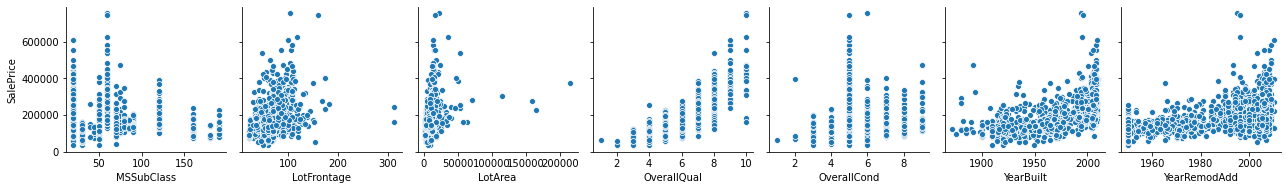

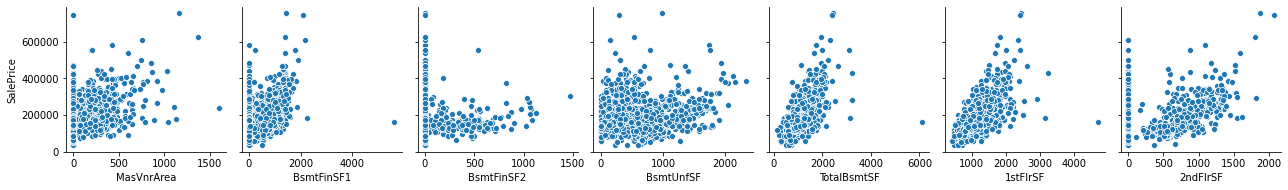

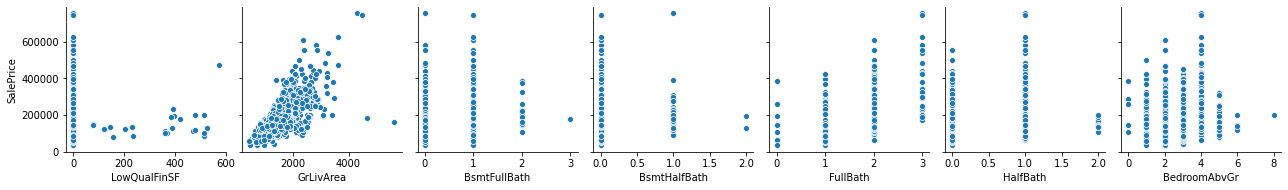

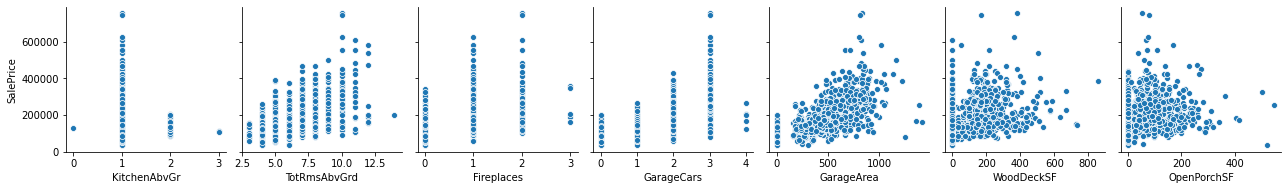

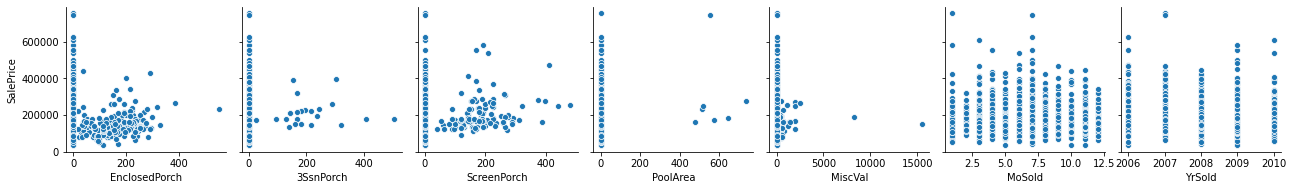

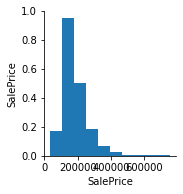

In [19]:
# length = 37
n = len(train_numeric.columns)

# Construct scatter plots in a matrix with 6 rows
num_rows = 5
split = n // num_rows

y_vars = ['SalePrice']

# plot scatter plots of all numerical independent variables against SalePrice
for i in range(split-1):
  sns.pairplot(train, y_vars = y_vars, x_vars = train_numeric.columns[split * i: split * (i+1)]);

Observe that there are several outliers.

In [20]:
# remove outliers
train = train[(train['LotArea'] < 15000) & (train['LotFrontage'] < 200) & (train['MasVnrArea'] < 1200) & (train['BsmtFinSF1'] < 4000)  ] 
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Gd,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,Ex,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,TA,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,Ex,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,GasA,Gd,Y,FuseA,1078,0,0,1078,1,0,1,0,2,1,Gd,5,Typ,0,Gd,Attchd,Unf,1,240,TA,TA,Y,366,0,112,0,0,0,0,4,2010,WD,Normal,142125


By inspecting all scatter plots above, it seems that the following continuous explanatory variables have linear relationship with respect to the SalesPrice.

1. LotArea
2. YearRemodAdd
3. TotalBsmtSF
4. 1stFlrSF
5. GrLivArea
6. GarageArea

However, the list above is just my personal opinion. Different people might have different list.

In [21]:
exp_var = ['LotArea', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'GarageArea']
train_exp = train[exp_var]
train_exp

,LotArea,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea
0,8450,2003,856,856,1710,548
1,9600,1976,1262,1262,1262,460
2,11250,2002,920,920,1786,608
3,9550,1970,756,961,1717,642
4,14260,2000,1145,1145,2198,836
...,...,...,...,...,...,...
1455,7917,2000,953,953,1647,460
1456,13175,1988,1542,2073,2073,500
1457,9042,2006,1152,1188,2340,252
1458,9717,1996,1078,1078,1078,240


## 2. Little or no multicollinearity among explanatory variables.

We will focus on the 6 explanatory variables above.

To determine existence of multicollinearity among the explanatory variables, we can look at their

1. pairwise correlation matrix or 
2. Variance Inflation Factor (VIF)

In [22]:
corr = train_exp.corr()
corr

,LotArea,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,GarageArea
LotArea,1.000000,0.075915,0.358837,0.424382,0.398362,0.352941
YearRemodAdd,0.075915,1.000000,0.286638,0.260510,0.295828,0.394672
TotalBsmtSF,0.358837,0.286638,1.000000,0.889411,0.390215,0.491989
1stFlrSF,0.424382,0.260510,0.889411,1.000000,0.500634,0.480073
GrLivArea,0.398362,0.295828,0.390215,0.500634,1.000000,0.452752
GarageArea,0.352941,0.394672,0.491989,0.480073,0.452752,1.000000


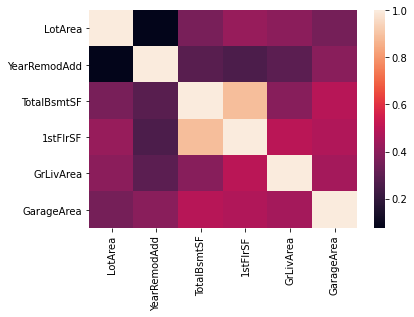

In [23]:
sns.heatmap(corr);

Looking at heatmap above, it seems that 1stFlrSF and TotalBsmtSF are highly correlated with correlation 0.889411.
However, the correlations above are pairwise in nature.
In other words, they are calculated when assuming other variables are constants.

In the following, we use VIF to check multicollinearity among all explanatory variables.
For each $1\leq j\leq n,$ recall that the VIF of explanatory variable $x_j$ is calculated by 
$$VIF_j = \frac{1}{1 - c^T R^{-1}_{xx}c}$$
where $c = (r_{x_1x_j}, r_{x_2x_j},...,r_{x_nx_j} )^T_{i\neq j}$ with $r_{x_ix_j}$ is the correlation between $x_i$ and $x_j$ and $R_{xx}$ is the correlation matrix of $\{x_i: 1\leq i\neq j \leq n\}$.
Note that $c^TR_{xx}^{-1}c$ is the squared of the **coefficient of multiple correlations**.

In [24]:
# As an example of using formula above to calculate VIF_1 (LotArea)

first_row = corr.iloc[0, 1:].values
Rxx = corr.iloc[1:, 1:].values
1 / (1 - first_row.dot(np.linalg.inv(Rxx)).dot(first_row.T))

1.3396366483498319

In [25]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = train_exp.assign(const=1)
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])], index=X.columns)

LotArea             1.339637
YearRemodAdd        1.245461
TotalBsmtSF         5.168550
1stFlrSF            5.675159
GrLivArea           1.598947
GarageArea          1.622789
const           11402.570421
dtype: float64

Since both TotalBsmtSF and 1stFlrSF have VIF greater than 5, they exhibit collinearity. 
So, we will remove them as explanatory variables.

In [26]:
del train_exp['TotalBsmtSF']
train_exp

,LotArea,YearRemodAdd,1stFlrSF,GrLivArea,GarageArea
0,8450,2003,856,1710,548
1,9600,1976,1262,1262,460
2,11250,2002,920,1786,608
3,9550,1970,961,1717,642
4,14260,2000,1145,2198,836
...,...,...,...,...,...
1455,7917,2000,953,1647,460
1456,13175,1988,2073,2073,500
1457,9042,2006,1188,2340,252
1458,9717,1996,1078,1078,240


## 3. Residuals have constant variance.


To calculate residuals, one must fit a model.
In this notebook, we will use linear regression model for prediction.

In Python, there are two well-known modules that provide linear regression; they are sklearn and statsmodel. 
Comparing the two modules, one might notice that sklearn's documentation and useres are far superior than statsmodel. 
However, in terms of complexity of statistics, statsmodel is superior than sklearn. 

When dealing with residuals, statsmodel has a better summary function compared to sklearn. So, in this section, we will use statsmodel in our analysis.

In [31]:
import statsmodels.api as sm

X = train_exp
y = train['SalePrice']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     787.9
Date:                Mon, 25 May 2020   Prob (F-statistic):               0.00
Time:                        05:30:05   Log-Likelihood:                -15487.
No. Observations:                1301   AIC:                         3.099e+04
Df Residuals:                    1295   BIC:                         3.102e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -1.89e+06   1.06e+05    -17.890   

In [0]:
del X['const']

test_exp = test[train_exp.columns].fillna(method='ffill')
reg = LinearRegression().fit(X,y)
ans = reg.predict(test_exp)
submit = pd.DataFrame(ans, index = test['Id'], columns = ['SalePrice'])
submit

submit.to_csv("/content/drive/My Drive/Jupyter Notebooks/House Prices - Advanced Regression Techniques/submission (Linear Regression).csv")